## Ionysis AEM Operation Plotting

In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D

Data Manipulation
## 1. Polarization Curve

In [251]:
def load_excel(file_path, experiment_name, sheet_name=None):
    """
    Reads an excel file at `file_path`, performs some preprocessing
    and assigns it the `experiment_name`.
    """
    try:
        # Load the specified sheet; if sheet_name is None, load the first sheet
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        
        # This Creates a new column 'Experiment Name'
        df['Experiment Name'] = experiment_name
        
        return df
    except Exception as e:
        print(f"Error loading file {file_path}, sheet: {sheet_name}")
        print(e)
        return None

def parse_files_or_sheets(file_or_folder_path, experiment_names, sheet_names=None, multiple_files=False):
    """
    Parses data from either multiple Excel files in a folder or multiple sheets in a single Excel file.

    Args:
        file_or_folder_path (str): Path to a folder (for multiple files) or a single Excel file.
        experiment_names (list): List of experiment names.
        sheet_names (list): List of sheet names (optional for single file with multiple sheets).
        multiple_files (bool): If True, process multiple Excel files. If False, process sheets in a single file.

    Returns:
        pd.DataFrame: Concatenated data from all files/sheets.
    """
    data_frames = []

    if multiple_files:
        # This handle multiple files in a folder
        file_paths = glob.glob(os.path.join(file_or_folder_path, "*.xlsx"))
        
        # This ensure that the number of files matches the number of experiment names
        if len(file_paths) != len(experiment_names):
            raise ValueError("The number of experiment names must match the number of Excel files.")

        # If sheet_names is not provided, then use None for each file
        if sheet_names is None:
            sheet_names = [None] * len(file_paths)

        # This ensure the number of sheet names matches the number of files if sheet_names are provided
        if len(sheet_names) != len(file_paths):
            raise ValueError("The number of sheet names must match the number of Excel files.")

        # This loads each file with its corresponding experiment name and sheet name
        for experiment_name, file_path, sheet_name in zip(experiment_names, file_paths, sheet_names):
            df = load_excel(file_path, experiment_name, sheet_name)
            if df is not None:
                data_frames.append(df)
    
    else:
        # Handle multiple sheets in a single file
        file_path = file_or_folder_path  # The path is now just the single Excel file

        # Ensure the number of experiment names matches the number of sheet names
        if len(experiment_names) != len(sheet_names):
            raise ValueError("The number of experiment names must match the number of sheet names.")
        
        # Load each sheet with its corresponding experiment name
        for experiment_name, sheet_name in zip(experiment_names, sheet_names):
            df = load_excel(file_path, experiment_name, sheet_name)
            if df is not None:
                data_frames.append(df)

    # Concatenate all data frames into one
    if len(data_frames) > 0:
        concatenated_data = pd.concat(data_frames, ignore_index=True)  # Use ignore_index to reset index
        return concatenated_data
    else:
        print("No data was loaded.")
        return None

# Option 1: Single Excel file with multiple sheets
#file_path = r"C:\Users\JuanJoséCastro\Documents\Internship\Raw Data\ET240122\ET240122_v6.xlsx"  # Single file path
experiment_names = ["","" ] #insert the experiment names
#sheet_names = ["", ""]  # Sheet names corresponding to experiments for single excel file with multiple sheets, uncomment if needed
#combined_data = parse_files_or_sheets(file_path, experiment_names, sheet_names, multiple_files=False)

# Option 2: Multiple Excel files in a folder
folder_path = r""  # Insert here the folder path for multiple files
sheet_names_multiple = ["", ""]  # Specify the sheet names for multiple files
combined_data_multiple = parse_files_or_sheets(folder_path, experiment_names, sheet_names=sheet_names_multiple, multiple_files=True)

# Print the total number of data points (rows) available in the concatenated data
if combined_data_multiple is not None:
    print(f"Total number of data points (multiple files): {len(combined_data_multiple)}")
    print(combined_data_multiple.head())  # Print the first few rows of the concatenated data

Total number of data points (multiple files): 2099
           Time stamp  Runtime / h  Runtime / s  Cycle Number  \
0 2024-10-18 12:39:18       0.4717         1698           1.0   
1 2024-10-18 12:39:27       0.4722         1700           1.0   
2 2024-10-18 12:39:36       0.4747         1709           1.0   
3 2024-10-18 12:39:45       0.4772         1718           1.0   
4 2024-10-18 12:39:54       0.4797         1727           1.0   

   Current avg / A  Current avg / mA  Current Density avg / A/cm²  \
0         0.001168             1.168                     0.000234   
1         0.001168             1.168                     0.000234   
2         0.001168             1.168                     0.000234   
3         0.001168             1.168                     0.000234   
4         0.001168             1.168                     0.000234   

   Current Density avg / mA/cm²  E_Stack avg / V  HFR1 / mOhm*cm²  ...  \
0                        0.2335           0.7154            329.1  ..

## 1.1. Polarization Curve Plot

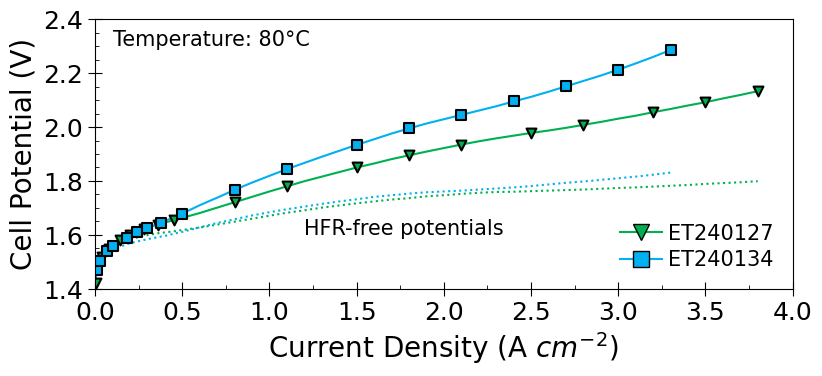

In [252]:
output_folder = r"" # Insert the folder path 
    """
    Creates the required plots and groups them by each 'Experiment Name'.
    Adds a second plot with a different y-column but no markers, and saves the output.
    """
    plt.figure(figsize=(9, 3.5))  # Adjust figure size if needed
    
    # Group data by the 'Experiment Name' column
    groups = data.groupby('Experiment Name')

    # Generate a color palette dynamically based on the number of groups
    num_groups = len(groups)
    color_palette = ['#00B050', '#00B0F0', '#C70039', '#900C3F', '#581845']  # Extended color palette
    markers = ['v', 's', 'D', '^', 'x']  # Different markers for each group

    # Initialize a list to hold legend elements
    legend_elements = []

    # Plot each group separately with custom styling
    for i, (name, group) in enumerate(groups):
        # Sort group by x_col (just in case data isn't sorted)
        group = group.sort_values(by=x_col)
        
        # Get the total number of data points
        num_points = len(group)
        
        # Select 20 evenly spaced indices, including the first and last
        indices = np.linspace(0, num_points - 1, 20, dtype=int)
        
        # Split the data into two parts: markers and the full line
        marker_data = group.iloc[indices]  # Data points with markers
        line_data = group  # Full data to plot the continuous line
        
        # Plot the continuous line for the original y-column data
        plt.plot(line_data[x_col], line_data[y_col], color=color_palette[i % len(color_palette)], 
                 linewidth=line_width, zorder=1)
        
        # Plot the markers on top of the line for the selected 20 points
        plt.scatter(marker_data[x_col], marker_data[y_col], s=50, color=color_palette[i % len(color_palette)], 
                    marker=markers[i % len(markers)], edgecolors='black', linewidths=1.5, zorder=2)
        
        # Plot the new y-column data without markers, using the same color
        plt.plot(line_data[x_col], line_data[y_col_new], color=color_palette[i % len(color_palette)], 
                 linewidth=line_width, linestyle='dotted', zorder=0)  # Dashed line for differentiation
        
        # Add a custom legend entry with both the line and marker
        legend_elements.append(Line2D([0], [0], color=color_palette[i % len(color_palette)], 
                                      marker=markers[i % len(markers)], label=name, markersize=8, 
                                      linewidth=line_width, markeredgecolor='black'))

    # Labels and legend
    plt.xlabel('Current Density (A $cm^{-2}$)', color='black', fontsize=20)
    plt.ylabel('Cell Potential (V)', color='black', fontsize=20)
    
    # Adjust the legend to show both line and marker
    plt.legend(handles=legend_elements, title='', loc='lower right', edgecolor='None', fontsize=15, markerscale=1.4, 
               labelspacing=0.3, handletextpad=0.3)
    plt.annotate('HFR-free potentials', (1.2, 1.6), fontsize=15, color='black')
    plt.annotate('Temperature: 80°C', (0.1, 2.3), fontsize=15, color='black')
    
    # Add minor ticks
    plt.minorticks_on()  # Enable minor ticks

    # Set the locator for the minor ticks (10 minor ticks between major ticks)
    plt.gca().xaxis.set_minor_locator(MultipleLocator(0.25))  # Adjust to fit data range
    plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))  # Adjust to fit data range

    # Adjust tick parameters for both major and minor ticks
    plt.tick_params(axis='x', colors='black', labelsize=18, which='both')  # Major and minor ticks
    plt.tick_params(axis='y', colors='black', labelsize=18, which='both')  # Major and minor ticks
    plt.tick_params(axis='x', which='major', direction='inout', length=10, colors='black', labelsize=18)
    plt.tick_params(axis='y', which='major', direction='inout', length=10, colors='black', labelsize=18)

# Adjust tick parameters for minor ticks to be inside the plot only
    plt.tick_params(axis='x', which='minor', direction='in', length=3, colors='black')
    plt.tick_params(axis='y', which='minor', direction='in', length=3, colors='black')
    
    plt.ylim(1.4, 2.4)
    #plt.yticks([0, 1, 2, 3, 4], color='black', fontsize=16)
    plt.xlim(0, 4)
    #plt.xticks([1.4, 1.6, 1.8, 2, 2.2,  2.4], color='black', fontsize=16)

    # Save the figure
    plt.savefig(output_filename, format="png", bbox_inches="tight")
    
    # Display the plot
    plt.show()

# Example usage:
polarizationcurve_plot_filename = os.path.join(output_folder, "Name.png")
create_plots(combined_data_multiple, "Current Density avg / A/cm²", "E_Stack avg / V", "E_stack avg comp HFR2 / V", polarizationcurve_plot_filename) 


## 2. High Frequency Resistance vs Current Density

<>:53: SyntaxWarning: invalid escape sequence '\O'
<>:53: SyntaxWarning: invalid escape sequence '\O'
C:\Users\JuanJoséCastro\AppData\Local\Temp\ipykernel_19468\4074733632.py:53: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('High frequency\n resistance (m$\Omega~cm^{2}$)', color='black', fontsize=20)


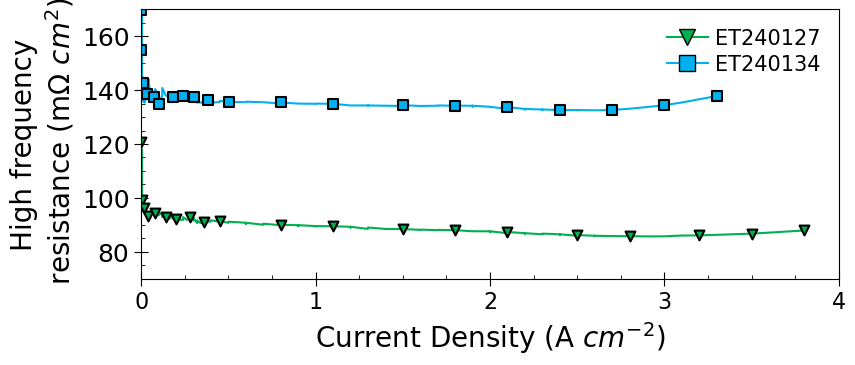

In [253]:
output_folder = r""

def create_plots(data, x_col, y_col, output_filename, line_width=1.5):
    """
    Creates the required plots and groups them by each 'Experiment Name'.
    Returns different graphs and saves them in the 'output_folder'.
    """
    plt.figure(figsize=(9, 3.5))  # Adjust figure size if needed
    
    # Group data by the 'Experiment Name' column
    groups = data.groupby('Experiment Name')

    # Generate a color palette dynamically based on the number of groups
    num_groups = len(groups)
    color_palette = ['#00B050', '#00B0F0', '#C70039', '#900C3F', '#581845']  # Extended color palette
    markers = ['v', 's', 'D', '^', 'x']  # Different markers for each group

    # Initialize a list to hold legend elements
    legend_elements = []

    # Plot each group separately with custom styling
    for i, (name, group) in enumerate(groups):
        # Sort group by x_col (just in case data isn't sorted)
        group = group.sort_values(by=x_col)
        
        # Get the total number of data points
        num_points = len(group)

        # Select 20 evenly spaced indices, including the first and last
        indices = np.linspace(0, num_points - 1, 20, dtype=int)
        if indices[-1] != num_points - 1:  # Ensure the last point is always included
            indices = np.append(indices, num_points - 1)

        # Split the data into two parts: markers and the full line
        marker_data = group.iloc[indices]  # Data points with markers
        line_data = group  # Full data to plot the continuous line
        
        # Plot the continuous line for the full data set with adjustable line width
        plt.plot(line_data[x_col], line_data[y_col], color=color_palette[i % len(color_palette)], 
                 linewidth=line_width, zorder=1)
        
        # Plot the markers on top of the line for the selected 20 points
        plt.scatter(marker_data[x_col], marker_data[y_col], s=50, color=color_palette[i % len(color_palette)], 
                    marker=markers[i % len(markers)], edgecolors='black', linewidths=1.5, zorder=2)
        
        # Add a custom legend entry with both the line and marker
        legend_elements.append(Line2D([0], [0], color=color_palette[i % len(color_palette)], 
                                      marker=markers[i % len(markers)], label=name, markersize=8, 
                                      linewidth=line_width, markeredgecolor='black'))

     # Labels and legend
    plt.xlabel('Current Density (A $cm^{-2}$)', color='black', fontsize=20)
    plt.ylabel('High frequency\n resistance (m$\Omega~cm^{2}$)', color='black', fontsize=20)
    
    # Adjust the legend to show both line and marker
    plt.legend(handles=legend_elements, title='', loc='best', edgecolor='None', fontsize=15, markerscale=1.4, 
               labelspacing=0.3, handletextpad=0.3)
    
    #plt.annotate('Temperature: 80°C', (0.1, 114), fontsize=15, color='black')
    
    # Add minor ticks
    plt.minorticks_on()  # Enable minor ticks

    # Set the locator for the minor ticks (10 minor ticks between major ticks)
    plt.gca().xaxis.set_minor_locator(MultipleLocator(0.25))  # Adjust to fit data range
    plt.gca().yaxis.set_minor_locator(MultipleLocator(5))  # Adjust to fit data range

    # Adjust tick parameters for both major and minor ticks
    plt.tick_params(axis='x', colors='black', labelsize=18, which='both')  # Major and minor ticks
    plt.tick_params(axis='y', colors='black', labelsize=18, which='both')  # Major and minor ticks
    plt.tick_params(axis='x', which='major', direction='inout', length=10, colors='black', labelsize=18)
    plt.tick_params(axis='y', which='major', direction='inout', length=10, colors='black', labelsize=18)

# Adjust tick parameters for minor ticks to be inside the plot only
    plt.tick_params(axis='x', which='minor', direction='in', length=3, colors='black')
    plt.tick_params(axis='y', which='minor', direction='in', length=3, colors='black')
    
    plt.xlim(0.4 , 4)
    plt.xticks([0, 1, 2, 3, 4], color='black', fontsize=16)
    plt.ylim(70, 170)
    #plt.yticks([70, 80, 90, 100, 110, 120], color='black', fontsize=16)
        
    # Save the figure
    plt.savefig(output_filename, format="png", bbox_inches="tight")
    
    # Display the plot
    plt.show()

    # Example usage:
polarizationcurve_plot_filename = os.path.join(output_folder, "Name.png")
create_plots(combined_data_multiple, "Current Density avg / A/cm²", "HFR2 / mOhm*cm²", polarizationcurve_plot_filename)

## 3. Degradation Rate: Stability over time

In [254]:
def load_excel(file_path, experiment_name, sheet_name=None):
    """
    Reads an excel file at `file_path`, performs some preprocessing
    and assigns it the `experiment_name`.
    """
    try:
        # Load the specified sheet; if sheet_name is None, load the first sheet
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        
        # Create a new column 'Experiment Name'
        df['Experiment Name'] = experiment_name
        
        return df
    except Exception as e:
        print(f"Error loading file {file_path}, sheet: {sheet_name}")
        print(e)
        return None

def parse_files_or_sheets(file_or_folder_path, experiment_names, sheet_names=None, multiple_files=False):
    """
    Parses data from either multiple Excel files in a folder or multiple sheets in a single Excel file.

    Args:
        file_or_folder_path (str): Path to a folder (for multiple files) or a single Excel file.
        experiment_names (list): List of experiment names.
        sheet_names (list): List of sheet names (optional for single file with multiple sheets).
        multiple_files (bool): If True, process multiple Excel files. If False, process sheets in a single file.

    Returns:
        pd.DataFrame: Concatenated data from all files/sheets.
    """
    data_frames = []

    if multiple_files:
        # Handle multiple files in a folder
        file_paths = glob.glob(os.path.join(file_or_folder_path, "*.xlsx"))
        
        # Ensure the number of files matches the number of experiment names
        if len(file_paths) != len(experiment_names):
            raise ValueError("The number of experiment names must match the number of Excel files.")

        # If sheet_names is not provided, use None for each file
        if sheet_names is None:
            sheet_names = [None] * len(file_paths)

        # Ensure the number of sheet names matches the number of files if sheet_names are provided
        if len(sheet_names) != len(file_paths):
            raise ValueError("The number of sheet names must match the number of Excel files.")

        # Load each file with its corresponding experiment name and sheet name
        for experiment_name, file_path, sheet_name in zip(experiment_names, file_paths, sheet_names):
            df = load_excel(file_path, experiment_name, sheet_name)
            if df is not None:
                data_frames.append(df)
    
    else:
        # Handle multiple sheets in a single file
        file_path = file_or_folder_path  # The path is now just the single Excel file

        # Ensure the number of experiment names matches the number of sheet names
        if len(experiment_names) != len(sheet_names):
            raise ValueError("The number of experiment names must match the number of sheet names.")
        
        # Load each sheet with its corresponding experiment name
        for experiment_name, sheet_name in zip(experiment_names, sheet_names):
            df = load_excel(file_path, experiment_name, sheet_name)
            if df is not None:
                data_frames.append(df)

    # Concatenate all data frames into one
    if len(data_frames) > 0:
        concatenated_data = pd.concat(data_frames, ignore_index=True)  # Use ignore_index to reset index
        return concatenated_data
    else:
        print("No data was loaded.")
        return None

# Option 1: Single Excel file with multiple sheets
#file_path = r"C:\Users\JuanJoséCastro\Documents\Internship\Raw Data\ET240122\ET240122_v6.xlsx"  # Single file path
experiment_names = ["", ""]
#sheet_names = ["5 GEIS Time res", "5 GEIS Time res"]  # Sheet names corresponding to experiments
#combined_data = parse_files_or_sheets(file_path, experiment_names, sheet_names, multiple_files=False)

# Option 2: Multiple Excel files in a folder
folder_path = r""  # Folder path for multiple files
sheet_names_multiple = ["", ""]  # Specify the sheet names for multiple files
combined_data_multiple = parse_files_or_sheets(folder_path, experiment_names, sheet_names=sheet_names_multiple, multiple_files=True)

# Print the total number of data points (rows) available in the concatenated data
if combined_data_multiple is not None:
    print(f"Total number of data points (multiple files): {len(combined_data_multiple)}")
    print(combined_data_multiple.head())  # Print the first few rows of the concatenated data

Total number of data points (multiple files): 2009
           Time stamp  Runtime / h  Runtime / s  Cycle Number  \
0 2024-10-18 15:12:05        3.047        10970           1.0   
1 2024-10-18 15:15:24        3.071        11060           1.0   
2 2024-10-18 15:18:43        3.127        11260           1.0   
3 2024-10-18 15:22:02        3.182        11450           2.0   
4 2024-10-18 15:25:21        3.237        11650           3.0   

   Current avg / A  Current avg / mA  Current Density avg / A/cm²  \
0            5.003              5003                        1.001   
1            5.003              5003                        1.001   
2            5.002              5002                        1.000   
3            5.002              5002                        1.000   
4            5.002              5002                        1.000   

   Current Density avg / mA/cm²  E_Stack avg / V  HFR1 / mOhm*cm²  ...  \
0                          1001            1.721            109.1  ..

C:\Users\JuanJoséCastro\AppData\Local\Temp\ipykernel_19468\3665933850.py:42: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('none').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(marker_data[x_col], marker_data[y_col], s=100, color=color_palette[i % len(color_palette)],


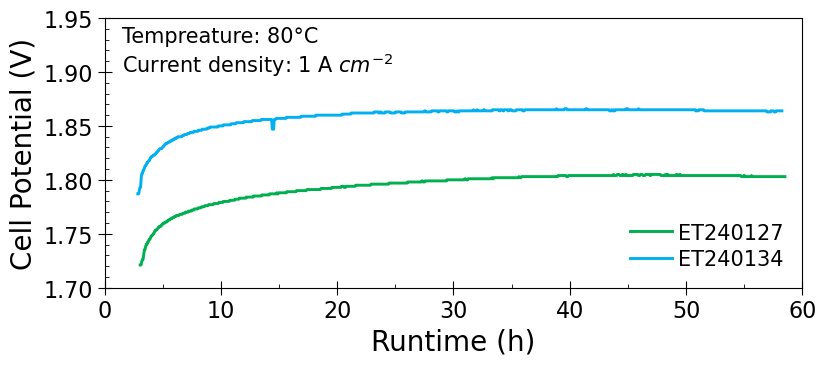

In [255]:
# Define the output folder, where the figures will be saved
output_folder = r""
def create_plots(data, x_col, y_col, output_filename, line_width=1.5):
    """
    Creates the required plots and groups them by each 'Experiment Name'.
    Returns different graphs and saves them in the 'output_folder'.
    """
    plt.figure(figsize=(9, 3.5))  # Adjust figure size if needed
    
    # Group data by the 'Experiment Name' column
    groups = data.groupby('Experiment Name')

    # Generate a color palette dynamically based on the number of groups
    num_groups = len(groups)
    color_palette = ['#00B050', '#00B0F0', '#C70039', '#900C3F', '#581845']  # Extended color palette
    markers = ['none', 'none', 'D', '^', 'x']  # Different markers for each group

    # Initialize a list to hold legend elements
    legend_elements = []

    # Plot each group separately with custom styling
    for i, (name, group) in enumerate(groups):
        # Sort group by x_col (just in case data isn't sorted)
        group = group.sort_values(by=x_col)
        
        # Get the total number of data points
        num_points = len(group)
        
        # Select 20 evenly spaced indices, including the first and last
        indices = np.linspace(0, num_points - 1, 20, dtype=int)
        
        # Split the data into two parts: markers and the full line
        marker_data = group.iloc[indices]  # Data points with markers
        line_data = group  # Full data to plot the continuous line
        
        # Plot the continuous line for the full data set with adjustable line width
        plt.plot(line_data[x_col], line_data[y_col], color=color_palette[i % len(color_palette)], 
                 linewidth=line_width, zorder=1)
        
        # Plot the markers on top of the line for the selected 20 points
        plt.scatter(marker_data[x_col], marker_data[y_col], s=100, color=color_palette[i % len(color_palette)], 
                    marker=markers[i % len(markers)], edgecolors='none', linewidths=1.5, zorder=2)
        
        # Add a custom legend entry with both the line and marker
        legend_elements.append(Line2D([0], [0], color=color_palette[i % len(color_palette)], 
                                      marker=markers[i % len(markers)], label=name, markersize=8, 
                                      linewidth=line_width, markeredgecolor='black'))

    # Labels and legend
    plt.xlabel('Runtime (h)', color='black', fontsize=20)
    plt.ylabel('Cell Potential (V)', color='black', fontsize=20)

    # Adjust the legend to show both line and marker
    plt.legend(handles=legend_elements, title='', loc='lower right', edgecolor='None', fontsize=15, markerscale=1.5, 
               labelspacing=0.3, handletextpad=0.3)
    
    plt.annotate('Tempreature: 80°C\nCurrent density: 1 A $cm^{-2}$', (1.5, 1.90), fontsize=15, color='black')
    
    # Add minor ticks
    plt.minorticks_on()  # Enable minor ticks

    # Set the locator for the minor ticks (10 minor ticks between major ticks)
    plt.gca().xaxis.set_minor_locator(MultipleLocator(5))  # Adjust to fit data range
    plt.gca().yaxis.set_minor_locator(MultipleLocator(0.01))  # Adjust to fit data range

    # Adjust tick parameters for both major and minor ticks
    plt.tick_params(axis='x', colors='black', labelsize=16, which='both')  # Major and minor ticks
    plt.tick_params(axis='y', colors='black', labelsize=16, which='both')  # Major and minor ticks
    plt.tick_params(axis='x', which='major', direction='inout', length=10, colors='black', labelsize=16)
    plt.tick_params(axis='y', which='major', direction='inout', length=10, colors='black', labelsize=16)

# Adjust tick parameters for minor ticks to be inside the plot only
    plt.tick_params(axis='x', which='minor', direction='in', length=3, colors='black')
    plt.tick_params(axis='y', which='minor', direction='in', length=3, colors='black')
    
    plt.xlim(0, 60)
    #plt.xticks([0, 1, 2, 3, 4], color='black', fontsize=16)
    plt.ylim(1.7, 1.95)
    #plt.yticks([70, 80, 90, 100, 110, 120], color='black', fontsize=16)
        

    # Save the figure
    plt.savefig(output_filename, format="png", bbox_inches="tight")
    
    # Display the plot
    plt.show()

currenthold_plot_file = os.path.join(output_folder, "Name.png")
create_plots(combined_data_multiple, "Runtime / h", "E_Stack avg / V", currenthold_plot_file, line_width=2.1)


In [260]:
from scipy.stats import linregress

def calculate_degradation_rate(data, runtime_col="Runtime / h", voltage_col="E_Stack avg / V", start_time=48):
    """
    Calculates the degradation rate (in mV/h) for each experiment starting from a specified runtime.
    Also prints the linear regression equation and the last voltage value for each experiment.
    """
    degradation_rates = {}

    # Group the data by experiment
    groups = data.groupby('Experiment Name')

    for experiment, group in groups:
        # Filter the data for the specified start time
        filtered_group = group[group[runtime_col] >= start_time]
        
        if len(filtered_group) > 1:  # Ensure there is enough data to perform a linear fit
            # Perform linear regression on Runtime (h) and Voltage (V)
            slope, intercept, r_value, p_value, std_err = linregress(filtered_group[runtime_col], filtered_group[voltage_col])

            # Convert slope to uV/h (since the slope is in V/h)
            degradation_rate_mVh = slope * 1000 * 1000

            # Retrieve the last voltage value in the filtered data
            last_voltage_value = filtered_group[voltage_col].iloc[-1]

            # Store the degradation rate for each experiment
            degradation_rates[experiment] = degradation_rate_mVh
            
            # Print the linear regression equation, degradation rate, and last voltage value
            print(f"Experiment: {experiment}")
            print(f"Linear regression equation: E(t) = {slope:.6f} * t + {intercept:.6f}")
            print(f"Degradation rate for {experiment}: {degradation_rate_mVh:.2f} uV/h")
            print(f"Last voltage value for {experiment}: {last_voltage_value:.6f} V\n")
        else:
            print(f"Not enough data for experiment {experiment} starting from {start_time} h.")
    
    return degradation_rates

# Calculate degradation rates for the combined data
degradation_rates = calculate_degradation_rate(combined_data_multiple)

Experiment: ET240127
Linear regression equation: E(t) = -0.000145 * t + 1.811413
Degradation rate for ET240127: -144.98 uV/h
Last voltage value for ET240127: 1.803000 V

Experiment: ET240134
Linear regression equation: E(t) = -0.000148 * t + 1.872126
Degradation rate for ET240134: -147.87 uV/h
Last voltage value for ET240134: 1.864000 V



## 4. High Frequency Resistance vs Time

<>:52: SyntaxWarning: invalid escape sequence '\O'
<>:52: SyntaxWarning: invalid escape sequence '\O'
C:\Users\JuanJoséCastro\AppData\Local\Temp\ipykernel_19468\3028396666.py:52: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('High frequency\n resistance (m$\Omega~cm^{2}$)', color='black', fontsize=20)
C:\Users\JuanJoséCastro\AppData\Local\Temp\ipykernel_19468\3028396666.py:42: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('none').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(marker_data[x_col], marker_data[y_col], s=100, color=color_palette[i % len(color_palette)],


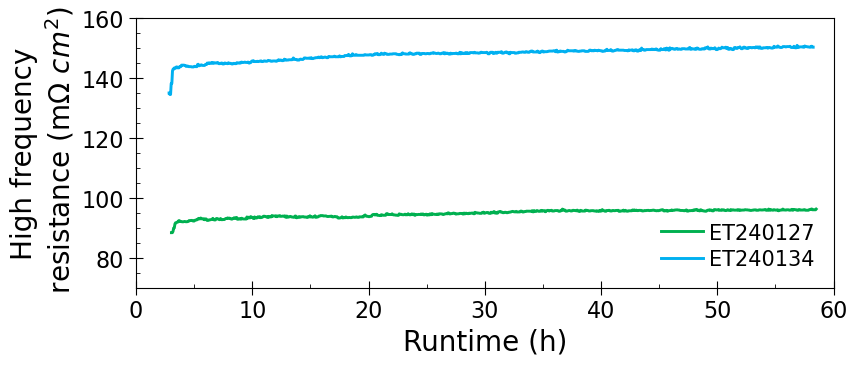

In [256]:
# Define the output folder, where the figures will be saved
output_folder = r""

def create_plots(data, x_col, y_col, output_filename, line_width=1.5):
    """
    Creates the required plots and groups them by each 'Experiment Name'.
    Returns different graphs and saves them in the 'output_folder'.
    """
    plt.figure(figsize=(9, 3.5))  # Adjust figure size if needed
    
    # Group data by the 'Experiment Name' column
    groups = data.groupby('Experiment Name')

    # Generate a color palette dynamically based on the number of groups
    num_groups = len(groups)
    color_palette = ['#00B050', '#00B0F0', '#C70039', '#900C3F', '#581845']  # Extended color palette
    markers = ['none', 'none', 'D', '^', 'x']  # Different markers for each group

    # Initialize a list to hold legend elements
    legend_elements = []

    # Plot each group separately with custom styling
    for i, (name, group) in enumerate(groups):
        # Sort group by x_col (just in case data isn't sorted)
        group = group.sort_values(by=x_col)
        
        # Get the total number of data points
        num_points = len(group)
        
        # Select 20 evenly spaced indices, including the first and last
        indices = np.linspace(0, num_points - 1, 20, dtype=int)
        
        # Split the data into two parts: markers and the full line
        marker_data = group.iloc[indices]  # Data points with markers
        line_data = group  # Full data to plot the continuous line
        
        # Plot the continuous line for the full data set with adjustable line width
        plt.plot(line_data[x_col], line_data[y_col], color=color_palette[i % len(color_palette)], 
                 linewidth=line_width, zorder=1)
        
        # Plot the markers on top of the line for the selected 20 points
        plt.scatter(marker_data[x_col], marker_data[y_col], s=100, color=color_palette[i % len(color_palette)], 
                    marker=markers[i % len(markers)], edgecolors='none', linewidths=1.5, zorder=2)
        
        # Add a custom legend entry with both the line and marker
        legend_elements.append(Line2D([0], [0], color=color_palette[i % len(color_palette)], 
                                      marker=markers[i % len(markers)], label=name, markersize=8, 
                                      linewidth=line_width, markeredgecolor='black'))

    # Labels and legend
    plt.xlabel('Runtime (h)', color='black', fontsize=20)
    plt.ylabel('High frequency\n resistance (m$\Omega~cm^{2}$)', color='black', fontsize=20)

    # Adjust the legend to show both line and marker
    plt.legend(handles=legend_elements, title='', loc='best', edgecolor='None', fontsize=15, markerscale=1.5, 
               labelspacing=0.3, handletextpad=0.3)
    
    #plt.annotate('Tempreature: 80°C\nCurrent density: 1 A $cm^{-2}$', (1, 110), fontsize=15, color='black')
    
    # Add minor ticks
    plt.minorticks_on()  # Enable minor ticks

    # Set the locator for the minor ticks (10 minor ticks between major ticks)
    plt.gca().xaxis.set_minor_locator(MultipleLocator(5))  # Adjust to fit data range
    plt.gca().yaxis.set_minor_locator(MultipleLocator(5))  # Adjust to fit data range

    # Adjust tick parameters for both major and minor ticks
    plt.tick_params(axis='x', colors='black', labelsize=16, which='both')  # Major and minor ticks
    plt.tick_params(axis='y', colors='black', labelsize=16, which='both')  # Major and minor ticks
    plt.tick_params(axis='x', which='major', direction='inout', length=10, colors='black', labelsize=16)
    plt.tick_params(axis='y', which='major', direction='inout', length=10, colors='black', labelsize=16)

# Adjust tick parameters for minor ticks to be inside the plot only
    plt.tick_params(axis='x', which='minor', direction='in', length=3, colors='black')
    plt.tick_params(axis='y', which='minor', direction='in', length=3, colors='black')
    
    plt.xlim(0, 60)
    #plt.xticks([0, 1, 2, 3, 4], color='black', fontsize=16)
    plt.ylim(70, 160)
    #plt.yticks([70, 80, 90, 100, 110, 120], color='black', fontsize=16)
        

    # Save the figure
    plt.savefig(output_filename, format="png", bbox_inches="tight")
    
    # Display the plot
    plt.show()

currenthold_plot_file = os.path.join(output_folder, "Name.png")
create_plots(combined_data_multiple, "Runtime / h", "HFR2 / mOhm*cm²", currenthold_plot_file, line_width=2.1)